So, where are we droppin' boys and girls? Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink.

PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game of all time, and has millions of active monthly players.

The team at PUBG has made official game data available for the public to explore and scavenge outside of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made possible through the PUBG Developer API.

You are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings.

What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do you need to be the top shot? Let's let the data do the talking!

Dataset’s columns Description:

groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

DBNOs - Number of enemy players knocked.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)

kills - Number of enemy players killed.

killStreaks - Max number of enemy players killed in a short amount of time.

longestKill - Longest distance between player and player killed at time of death. This may be misleading,

as downing a - player and driving away may lead to a large longestKill stat.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as

sometimes the data skips over placements.

numGroups - Number of groups we have data for in the match.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

Tasks to be performed:

1. Read the dataset.
2. Check the datatype of all the columns.
3. Find the summary of all the numerical columns and write your findings about it.
4. The average person kills how many players?
5. 99% of people have how many kills?
6. The most kills ever recorded are how much?
7. Print all the columns of the dataframe.
8. Comment on distribution of the match's duration. Use seaborn.
9. Comment on distribution of the walk distance. Use seaborn.
10. Plot distribution of the match's duration vs walk distance one below the other.
11. Plot distribution of the match's duration vs walk distance side by side.
12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.
13. How many unique values are there in 'matchType' and what are their counts?
14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.
15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.
16. Find the Categorical columns.
17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.
18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.
19. Change the orientation of the above plot to horizontal.
20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,teamKills, roadKills.
21. Round off column ‘winPlacePerc’ to 2 decimals.
22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.


                                                                                ##Author:Meet Vansjaliya

# 1. Read the Dataset


In [ ]:
import pandas as pd
data=pd.read_csv('pubg - Dr. Darshan Ingle.csv')

# 2. Check The Datatype Of All Columns

In [2]:
data.dtypes


Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

# 3. Find the summary of all the numerical columns and write your findings about it.

In [3]:
data.describe()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


The dataset consists of total 25 columns of numerical datatype 2. mean gives the average value of that column 3. std gives the standard deviation of that column 4. min gives the minmum value present in that column 5. max gives the maximum value present in that column 6. 25% gives the 25% of that data 7. 50% gives the 50% of that data 8. 75% gives the 75% of that data


# 4. The average person kills how many players?

In [4]:
data.kills.mean()

0.9134

# 5. 99% of people have how many kills?

In [6]:
import numpy as np
np.percentile(data.kills,99)


7.0

# 6. The most kills ever recorded are how much?

In [7]:
data.kills.max()

35

# 7. Print all the columns of the dataframe.

In [8]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# 8. Comment on distribution of the match's duration. Use seaborn.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


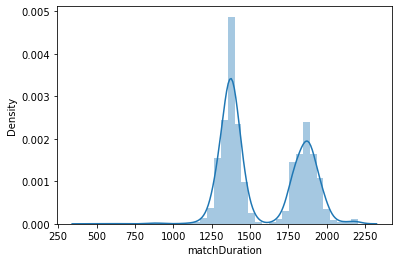

In [9]:
import seaborn as sb
sb.distplot(data.matchDuration);

min value is 464 2. max values is 2202 3. std is 258.96 4. mean is 1575.39

# 9. Comment on distribution of the walk distance. Use seaborn.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


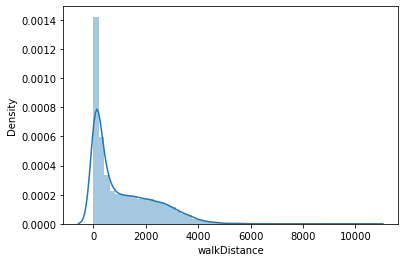

In [10]:
import seaborn as sb
sb.distplot(data.walkDistance);

 min value is 0 2. max values is 10490 3. std is 1168.59 4. mean is 1130.00

# 10. Plot distribution of the match's duration vs walk distance one below the other.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


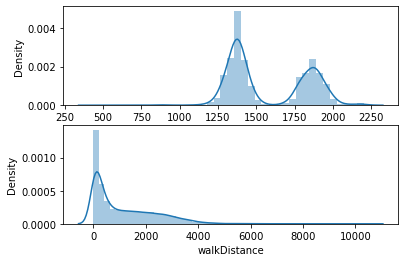

In [11]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,1)
sb.distplot(data.matchDuration,ax=axs[0]);
sb.distplot(data.walkDistance,ax=axs[1]);


# 11. Plot distribution of the match's duration vs walk distance side by side.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


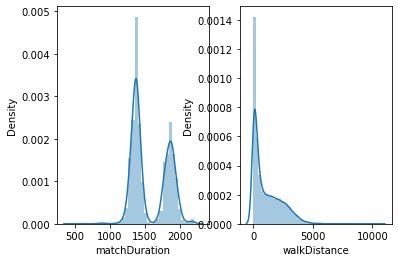

In [12]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,2)
sb.distplot(data.matchDuration,ax=axs[0]);
sb.distplot(data.walkDistance,ax=axs[1]);


# 12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.


In [ ]:
sb.pairplot(data);

# 13. How many unique values are there in 'matchType' and what are their counts?

In [ ]:
data.matchType.value_counts()

# 14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.


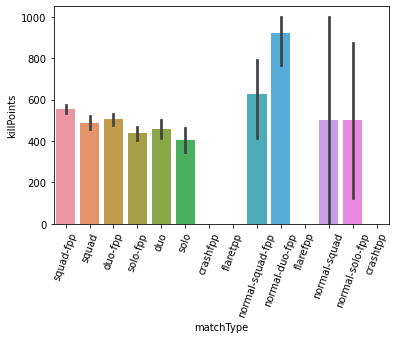

In [16]:
sb.barplot(data.matchType,data.killPoints);
plt.xticks(rotation=70);

normal-squad-fpp and normal-squad-fpp match types has the most kill points solo-fpp and solo match types has the less kill points

# 15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences

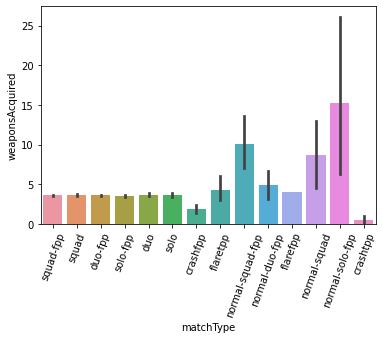

In [17]:
sb.barplot(data.matchType,data.weaponsAcquired);
plt.xticks(rotation=70);

In crashtpp and crashfpp match types weapons acquired by players are very less In normal-solo-fpp and normal-squad-fpp match types weapons acquired by players are more

# 16. Find the Categorical columns.

In [18]:
data.select_dtypes(exclude=['number'])

,Id,groupId,matchId,matchType
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,squad-fpp
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,squad-fpp
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,squad-fpp
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,squad
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,squad-fpp
...,...,...,...,...
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,squad-fpp
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,duo-fpp
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,duo-fpp
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,duo-fpp


# 17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.

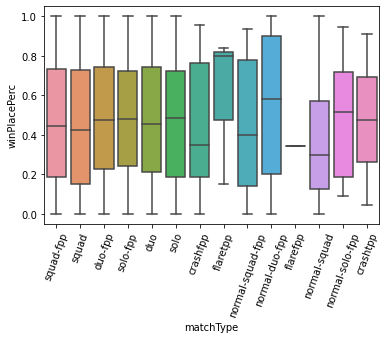

In [23]:
sb.boxplot(data.matchType,data.winPlacePerc);
plt.xticks(rotation=70);

# 18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.

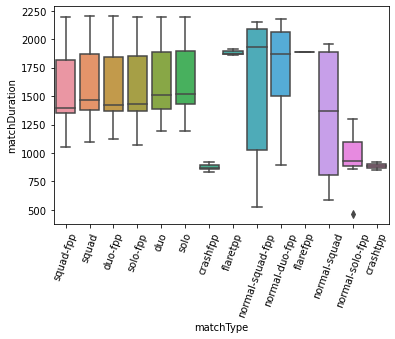

In [24]:
sb.boxplot(data.matchType,data.matchDuration);
plt.xticks(rotation=70);


# 19. Change the orientation of the above plot to horizontal.

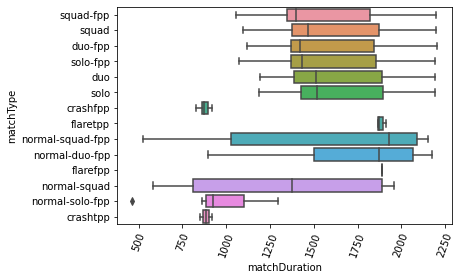

In [27]:
sb.boxplot(data.matchDuration,data.matchType);
plt.xticks(rotation=70);

# 20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,teamKills, roadKills

In [28]:
data['KILL']=(data.headshotKills+data.roadKills+data.teamKills)
kd=pd.DataFrame(data[['headshotKills','roadKills','teamKills','KILL']])
print(kd.head())

   headshotKills  roadKills  teamKills  KILL
0              0          0          0     0
1              1          0          0     1
2              1          0          0     1
3              0          0          0     0
4              0          0          0     0


# 21. Round off column ‘winPlacePerc’ to 2 decimals

In [29]:
data['winPlacePerc']=round(data['winPlacePerc'],2)
data['winPlacePerc']

0       0.00
1       0.22
2       0.86
3       0.35
4       0.07
        ... 
9995    0.83
9996    0.72
9997    0.21
9998    0.24
9999    0.19
Name: winPlacePerc, Length: 10000, dtype: float64

# 22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution

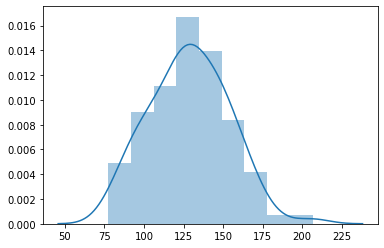

In [31]:
import numpy as np
x = []
for i in range(100):
    x.append(data['damageDealt'].sample(50).mean())
means = np.array(x)
sb.distplot(means);